# Wine Quality

### Data Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. 

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
df= pd.read_csv(r"winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### About Columns

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - Output variable (based on sensory data): quality (score between 0 and 10)

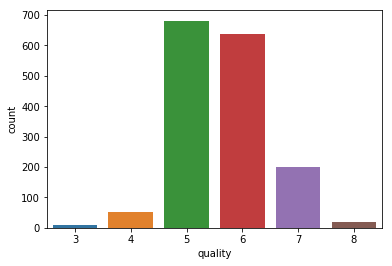

In [5]:
# To check for count of quality score specified in data
sns.countplot(x="quality", data=df)

Majority of the wine are of quality 5 and 6.

### EDA

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value is data

In [7]:
df.shape

(1599, 12)

Data Frame has 1599 rows and 12 columns. We'll now drop duplicate data (if any).

In [8]:
df.drop_duplicates(inplace=True)

Now we will drop duplicate data (if any)

In [9]:
df.shape

(1359, 12)

Data had duplicate rows and hence now our data has 1359 rows and 12 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


All data is numeric. Thus, inorder to build a Machine Learning Model we don't need to encode any of it.

#### Relation Between features and Label

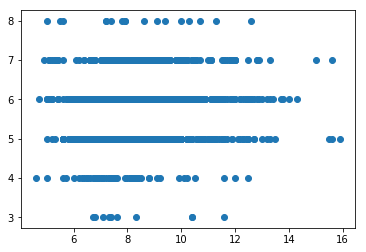

In [11]:
plt.scatter(x="fixed acidity",y="quality",data=df)

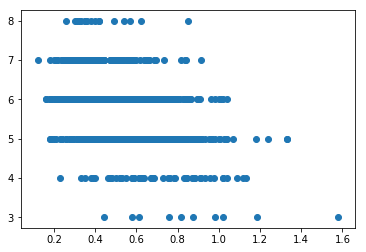

In [12]:
plt.scatter(x="volatile acidity",y="quality",data=df)

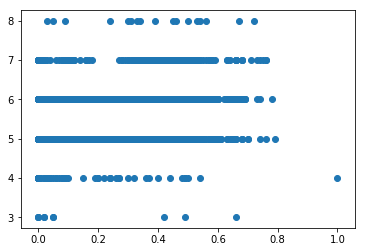

In [13]:
plt.scatter(x="citric acid",y="quality",data=df)

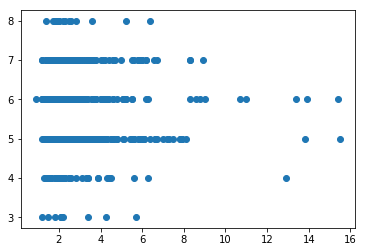

In [14]:
plt.scatter(x="residual sugar",y="quality",data=df)

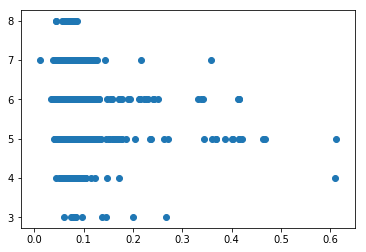

In [15]:
plt.scatter(x="chlorides",y="quality",data=df)

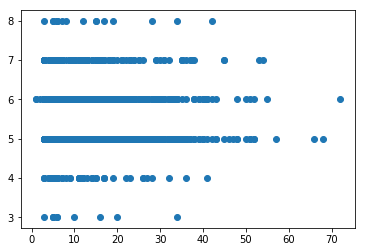

In [16]:
plt.scatter(x="free sulfur dioxide",y="quality",data=df)

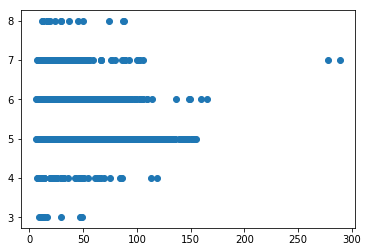

In [17]:
plt.scatter(x="total sulfur dioxide",y="quality",data=df)

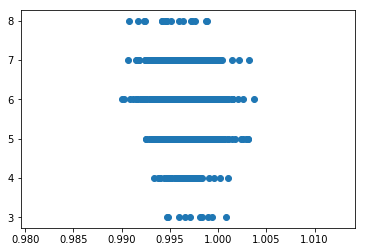

In [18]:
plt.scatter(x="density",y="quality",data=df)

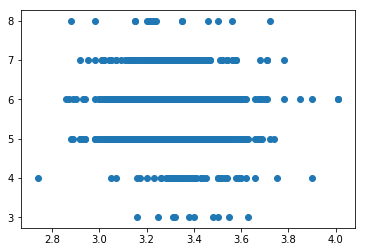

In [19]:
plt.scatter(x="pH",y="quality",data=df)

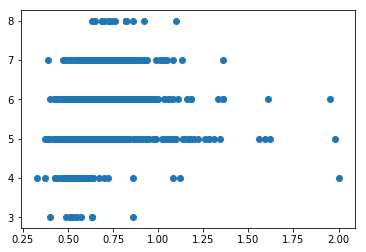

In [20]:
plt.scatter(x="sulphates",y="quality",data=df)

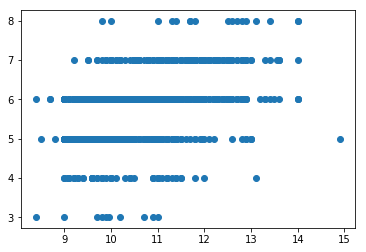

In [21]:
plt.scatter(x="alcohol",y="quality",data=df)

### Describing Data

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above we observe the mean, Standard Deviation, median, quartiles, min value and max value for each feature. "quality" is categorical variable and hence we cannot draw conclusions from it.

No. of rows= 1359


No. of columns= 12

#### fixed acidity: 
Mean= 8.31059, std= 1.73699, min= 4.6, max= 15.9

#### volatile acidity: 
Mean= 0.529, std= 0.183, min= 0.12, max= 1.58

#### citric acid: 
Mean= 0.27233, std= 0.19553, min= 0, max= 1

#### regular sugar: 
Mean= 2.52340, std= 1.3523, min= 0.9, max= 15.5

#### chlorides: 
Mean= 0.08812, std= 0.04937, min= 0.012, max= 0.0611

#### free sulfur dioxide: 
Mean= 15.89330, std= 10.447270, min= 1, max= 72

#### total sulfur dioxide: 
Mean= 46.825975, std= 33.408946, min= 6, max= 289

#### density: 
Mean= 0.996709, std= 0.001869, min= 0.99007, max= 1.003690

#### pH: 
Mean= 3.30978, std= 0.155036, min= 2.74, max= 4.01

#### sulphates: 
Mean= 0.658705, std= 0.17066, min= 0.33, max= 2

#### alcohol: 
Mean= 10.432315, std= 1.082065, min= 8.4, max= 14.9

### Correlation 

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


#### Plotting of heatmap

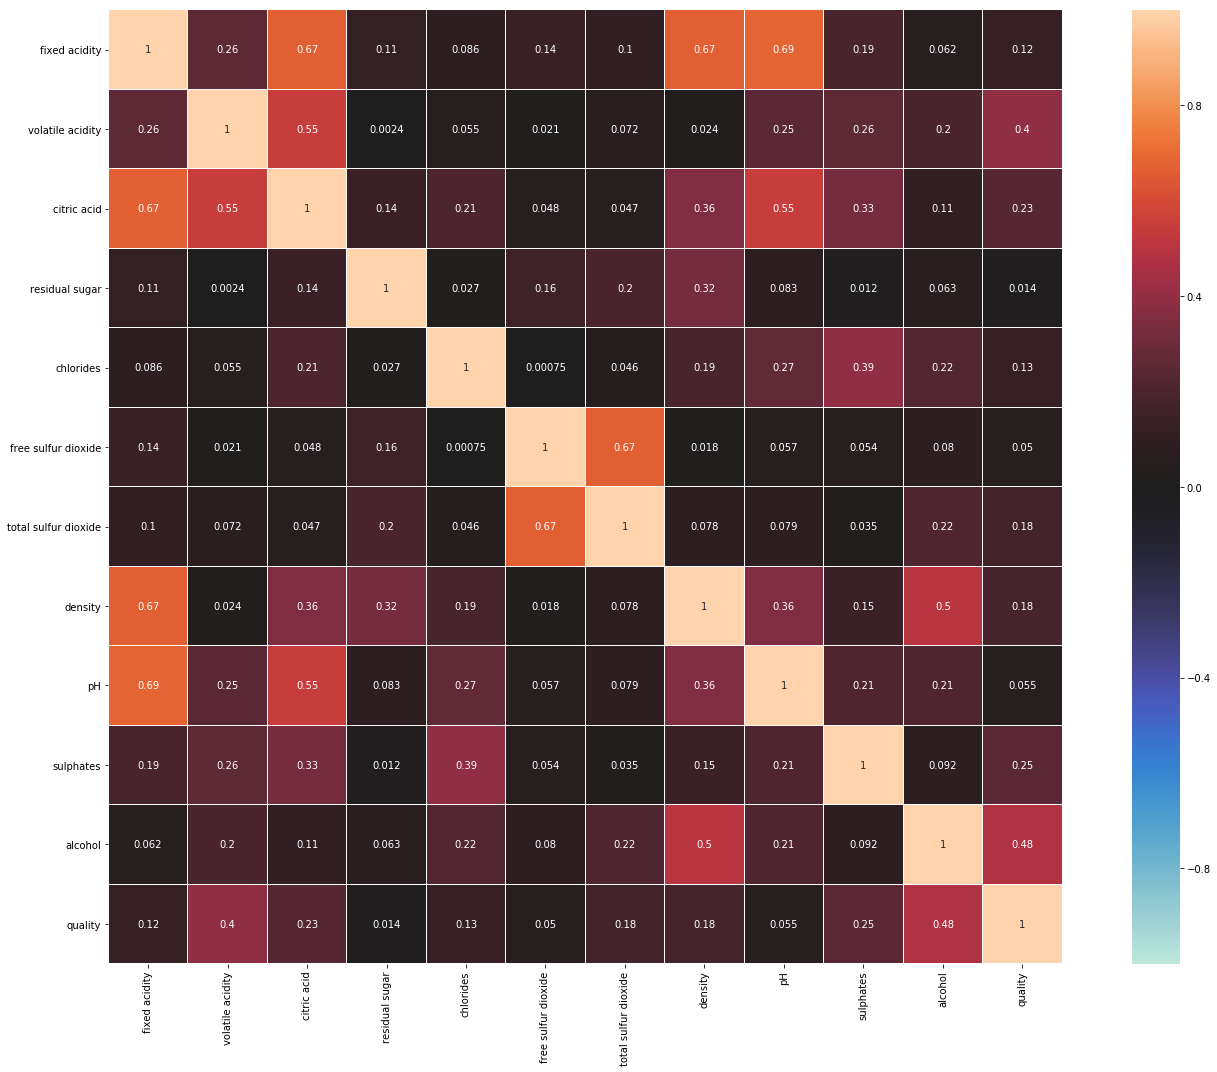

In [24]:
df_corr= df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

Features have both positive and negative correlation with wine quality.
Fixed acidity has 12% positive correlation, volatile acity has 39.5% negative corelation, citric acid has 22.8% positive correlation, residual sugar has 1.4% positive correlation, chlorides has 13% negative corelation, free sulfur dioxide has 5% negative correlation, total sulfur dioxide 17.8% negative correlation, density has 18% negative correlation, pH has 5.5% negative correlation, sulphates has 25% positive corelation, alcohol has 48% positive correlation. 

Max correlation: Alcohol


Min correlation: Residual sugar

### Check for Outliers

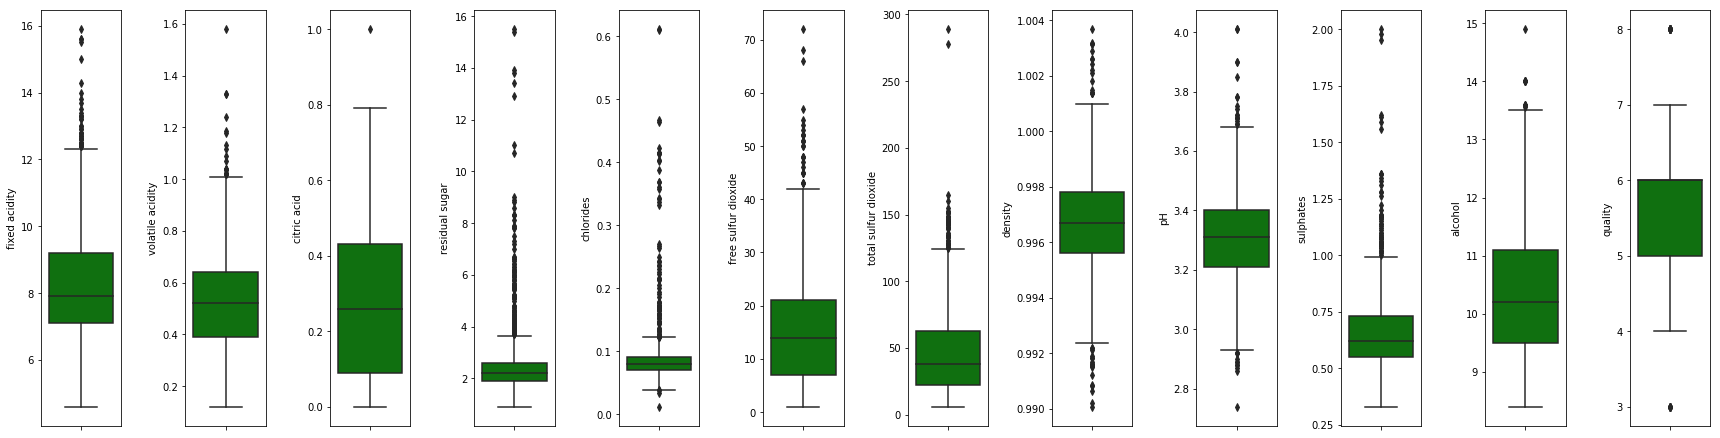

In [25]:
collist=df.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From above plot we observe that 'citric acid' and 'alcohol' has less outliers whereas,'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH' and 'sulphates'have more outliers

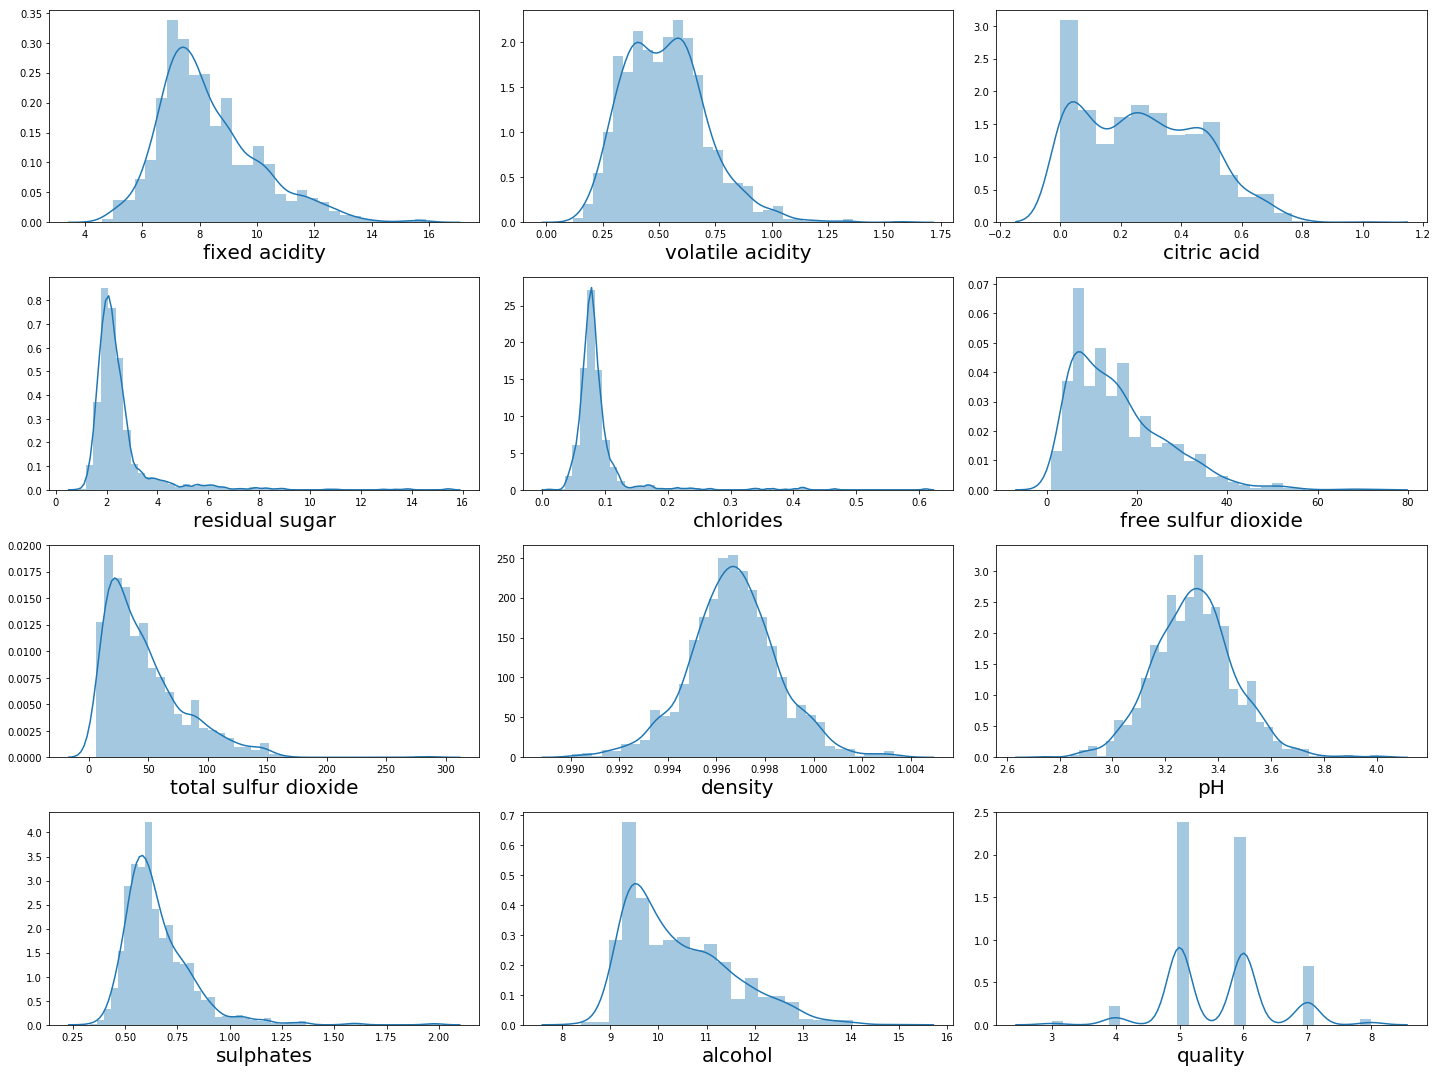

In [26]:
## checking for Normal Distribution of curve
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

We observe that only density and pH data are normalised and all other data in above graphs is not normalised. Therefore Normal Distribution Curve here are irrelevant.

## Data Cleaning

In [27]:
delete=pd.DataFrame([[0.0136,"Residual Sugar","No","Yes"],[0.055,"pH","Yes","Yes"],[0.0504,"free sulfur dioxide","No","Yes"]],
                    columns=["Correlation","Column Namr","Normalized","Outliers"])
delete

,Correlation,Column Namr,Normalized,Outliers
0,0.0136,Residual Sugar,No,Yes
1,0.0550,pH,Yes,Yes
2,0.0504,free sulfur dioxide,No,Yes


In [28]:
df=df.drop(columns=["residual sugar","free sulfur dioxide"],axis=1)

In [29]:
z=np.abs(stats.zscore(df))
index=(np.where(z>3)[0])
df=df.drop(df.index[index])
df.shape

(1263, 10)

#### Percentage of data loss

In [50]:
print("Percentage of data loss= ",((1359-1263)/1359)*100)

Percentage of data loss=  7.06401766004415


Data Loss= 7%

#### Check for skewness

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [32]:
x.skew()

fixed acidity           0.811289
volatile acidity        0.412951
citric acid             0.286028
chlorides               2.516712
total sulfur dioxide    1.117714
density                 0.027560
pH                      0.118389
sulphates               0.943864
alcohol                 0.765739
dtype: float64

We stll observe skewed data so we'll use power transformation

In [33]:
from sklearn.preprocessing import power_transform

In [34]:
x=power_transform(x,method='yeo-johnson')

In [35]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

## Model Building

In [36]:
x_train, x_test, y_train, y_test= train_test_split(x, y , test_size=0.25, random_state=355)

In [37]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
print("knn model Score =",accuracy_score(y_test,y_pred))

knn model Score = 0.5664556962025317


In [38]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))

Decision Tree model Score = 0.5221518987341772


In [39]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
print("SVM model Score =",accuracy_score(y_test,y_pred))

SVM model Score = 0.6012658227848101


### Choosing best model

In [40]:
cross_val_score(knn, x_scaled, y, cv=5)
cross_val_score(KNeighborsClassifier(), x_scaled, y, cv=5).mean()

0.5360091599222033

In [41]:
cross_val_score(clf, x_scaled, y, cv=5)
cross_val_score(DecisionTreeClassifier(), x_scaled, y, cv=5).mean()

0.4916713721061547

In [42]:
cross_val_score(svc, x_scaled, y, cv=5)
cross_val_score(SVC(), x_scaled, y, cv=5).mean()

0.5677300959909656

From Cross validation techniques we observe that SVM model is the best Model and now we'll proceed to tuning our parameters to achieve better accuracy

### Hyper-parametric Tuning

In [43]:
svc=SVC()
param={'kernel':['linear','poly','rbf'],'gamma':['scale','auto'] ,'probability':[True, False],'degree':[2,3,4,5]}
grid_search=GridSearchCV(estimator=svc, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}


In [44]:
svc= SVC(degree=2,gamma='scale',kernel='rbf',probability=True)
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
print("SVC model Score =",accuracy_score(y_test,y_pred))

SVC model Score = 0.6012658227848101


In [45]:
cfm =confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Confusion Matrix :
 [[  0  11   3   0   0]
 [  0 100  33   1   0]
 [  0  38  78   6   0]
 [  0   2  29  12   0]
 [  0   0   1   2   0]] 

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.66      0.75      0.70       134
           6       0.54      0.64      0.59       122
           7       0.57      0.28      0.37        43
           8       0.00      0.00      0.00         3

    accuracy                           0.60       316
   macro avg       0.36      0.33      0.33       316
weighted avg       0.57      0.60      0.58       316



#### AUC ROC Curve for all classes

In [46]:
import scikitplot as skplt

In [47]:
prob=svc.predict_proba(x_test)

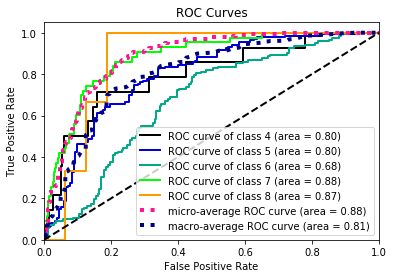

In [48]:
skplt.metrics.plot_roc(y_test,prob)
plt.show()

### Saving Model

In [49]:
filename= "Wine_quality.pickle"
pickle.dump(svc,open(filename,'wb'))